# Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# Cardiovascular Disease Detection (EDA, Decision Tree, Random Forest, & AdaBoost)¶

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)
from sklearn.metrics import precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

# Download and Explore the Data

In [2]:
# Loading the dataframe
disease_df = pd.read_csv("C:/Users/Monali/Desktop/cardivascular dataset.csv",sep=';')


In [3]:
disease_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Size of the dataset
disease_df.shape

(70000, 13)

In [5]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
disease_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
disease_df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [8]:
disease_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
disease_df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# seprate dependent and independent columns

In [10]:
x=disease_df.iloc[:,0:12]
y=disease_df.iloc[:,-1]

In [11]:
x.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0


In [12]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [13]:
# Separating numeric and categorical columns
numeric_cols = disease_df.select_dtypes(include = np.number).columns.tolist()
print("Numerical Columns:", numeric_cols)

categorical_cols = disease_df.select_dtypes(include = 'object').columns.tolist()
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
Categorical Columns: []


# Preparing the Data for the Model

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((56000, 12), (14000, 12), (56000,), (14000,))

# logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [17]:
lg.fit(x_train,y_train)

LogisticRegression()

In [18]:
lg_p=lg.predict(x_test)
lg_p

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [19]:
lg_prob=lg.predict_proba(x_test)
#lg_prob

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
lg_m=confusion_matrix(lg_p,y_test)
lg_m

array([[5139, 2459],
       [1830, 4572]], dtype=int64)

In [22]:
lg_ac=lg_m.diagonal().sum()/lg_m.sum()*100
lg_ac

69.36428571428571

In [23]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.6502631204665055

In [24]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.7141518275538894

In [25]:
lg_f1=f1_score(lg_p,y_test)
lg_f1

0.6807116801905755

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      7598
           1       0.65      0.71      0.68      6402

    accuracy                           0.69     14000
   macro avg       0.69      0.70      0.69     14000
weighted avg       0.70      0.69      0.69     14000



# decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [29]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
dt_p=dt.predict(x_test)

In [31]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[4409, 2667],
       [2560, 4364]], dtype=int64)

In [32]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

62.66428571428572

In [33]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.6206798463945384

In [34]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.6302715193529752

In [35]:
dt_f1=f1_score(dt_p,y_test)
dt_f1

0.625438910784665

In [38]:
 print(classification_report(dt_p,y_test))


              precision    recall  f1-score   support

           0       0.63      0.62      0.63      7076
           1       0.62      0.63      0.63      6924

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



# random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
rf_p=rf.predict(x_test)

In [42]:
cf=confusion_matrix(rf_p,y_test)
cf

array([[5250, 2146],
       [1719, 4885]], dtype=int64)

In [43]:
rf_ac=cf.diagonal().sum()/cf.sum()*100
rf_ac

72.39285714285715

In [44]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.6947802588536481

In [45]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.7397032101756511

In [46]:
rf_f1=f1_score(rf_p,y_test)
rf_f1

0.7165383204987166

In [49]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      7396
           1       0.69      0.74      0.72      6604

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



# boosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [52]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [53]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [54]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[4428, 2656],
       [2541, 4375]], dtype=int64)

In [55]:
ad_ac=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_ac

62.878571428571426

In [56]:
ad_pr=precision_score(ad_p,y_test)
ad_pr

0.6222443464656521

In [57]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.6325910931174089

In [58]:
ad_f1=f1_score(ad_p,y_test)
ad_f1

0.6273750627375062

In [60]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63      7084
           1       0.62      0.63      0.63      6916

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



# XGBOOST classifier

In [61]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [62]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
xgb_p=xgb.predict(x_test)

In [64]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[5356, 2209],
       [1613, 4822]], dtype=int64)

In [65]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

72.7

In [66]:
xgb_pr=precision_score(xgb_p,y_test)
xgb_pr

0.6858199402645427

In [67]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.7493395493395494

In [68]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_f1

0.7161740680231696

In [69]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      7565
           1       0.69      0.75      0.72      6435

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [72]:
k_p=knn.predict(x_test)
k_p

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
ck=confusion_matrix(k_p,y_test)
ck

array([[4428, 3436],
       [2541, 3595]], dtype=int64)

In [74]:
k_ac=ck.diagonal().sum()/ck.sum()*100
k_ac

57.30714285714286

In [75]:
knn_pr=precision_score(k_p,y_test)
knn_pr

0.5113070686957758

In [76]:
knn_re=recall_score(k_p,y_test)
knn_re

0.5858865710560626

In [77]:
knn_f1=f1_score(k_p,y_test)
knn_f1

0.5460621250094934

In [78]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      7864
           1       0.51      0.59      0.55      6136

    accuracy                           0.57     14000
   macro avg       0.57      0.57      0.57     14000
weighted avg       0.58      0.57      0.57     14000



In [222]:
lst=list()

In [223]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

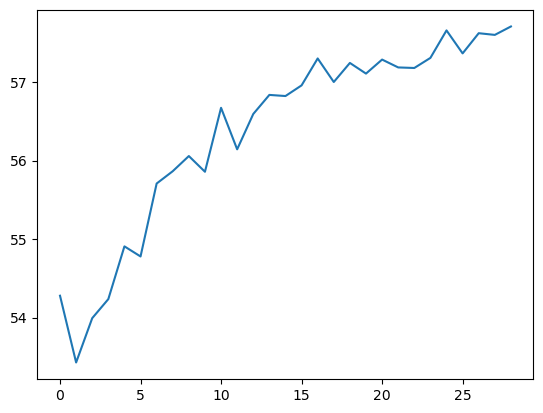

In [224]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# svm

In [81]:
from sklearn.svm import SVC
svc=SVC()

In [82]:
svc.fit(x_train,y_train)

SVC()

In [83]:
s_p=svc.predict(x_test)
s_p

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [84]:
cs=confusion_matrix(s_p,y_test)
cs

array([[3702, 2379],
       [3267, 4652]], dtype=int64)

In [85]:
s_ac=cs.diagonal().sum()/cs.sum()*100
s_ac

59.67142857142858

In [86]:
s_pr=precision_score(s_p,y_test)
s_pr

0.6616413028018774

In [87]:
s_re=recall_score(s_p,y_test)
s_re

0.5874479100896578

In [88]:
s_f1=f1_score(s_p,y_test)
s_f1

0.6223411371237458

In [89]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57      6081
           1       0.66      0.59      0.62      7919

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.59     14000
weighted avg       0.60      0.60      0.60     14000



In [90]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","ADA BOOST","XGBOOST","KNN","SVM"]
list2=[lg_ac,dt_ac,rf_ac,ad_ac,xgb_ac,k_ac,s_ac]
list3=[lg_pr,dt_pr,rf_pr,ad_pr,xgb_pr,knn_pr,s_pr]
list4=[lg_re,dt_re,rf_re,ad_re,xgb_re,knn_re,s_re]
list5=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,knn_f1,s_f1]



In [91]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df1

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,69.364286,0.650263,0.714152,0.680712
1,DECISION TREE,62.664286,0.620680,0.630272,0.625439
2,RANDOM FOREST,72.392857,0.694780,0.739703,0.716538
3,ADA BOOST,62.878571,0.622244,0.632591,0.627375
4,XGBOOST,72.700000,0.685820,0.749340,0.716174
5,KNN,57.307143,0.511307,0.585887,0.546062
6,SVM,59.671429,0.661641,0.587448,0.622341


# AUC-ROC curve

In [92]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [93]:
roc=roc_auc_score(rf_p,y_test)
roc

0.7247731843198428

In [94]:
rf_prob=rf.predict_proba(x_test)

In [95]:
df=pd.DataFrame(rf_prob)
#df

In [96]:
fpr,tpr,threshhold=roc_curve(y_test,df.iloc[:,1])

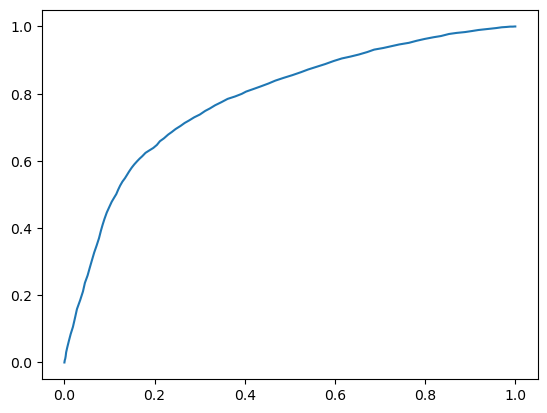

In [97]:
plt.plot(fpr,tpr)

# Exploratory Data Analysis (EDA)

The original dataset is already ordinally encoded. But for interpretation purposes during visualization, I created a new dataframe, in which ordinal numbers were replaced with corresponding categorical values.

In [98]:
viz_df = disease_df.copy(deep = True)

viz_df['age'] = (viz_df['age'] / 365).round().astype('int')
viz_df['gender'].replace({1: 'woman', 2: 'man'}, inplace = True)
viz_df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
viz_df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
viz_df['smoke'].replace({0: 'No', 1: 'Yes'}, inplace = True)
viz_df['alco'].replace({0: 'No', 1: 'Yes'}, inplace = True)
viz_df['active'].replace({0: 'No', 1: 'Yes'}, inplace = True)
viz_df['cardio'].replace({0: 'No', 1: 'Yes'}, inplace = True)

viz_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,man,168,62.0,110,80,normal,normal,No,No,Yes,No
1,1,55,woman,156,85.0,140,90,well above normal,normal,No,No,Yes,Yes
2,2,52,woman,165,64.0,130,70,well above normal,normal,No,No,No,Yes
3,3,48,man,169,82.0,150,100,normal,normal,No,No,Yes,Yes
4,4,48,woman,156,56.0,100,60,normal,normal,No,No,No,No
5,8,60,woman,151,67.0,120,80,above normal,above normal,No,No,No,No
6,9,61,woman,157,93.0,130,80,well above normal,normal,No,No,Yes,No
7,12,62,man,178,95.0,130,90,well above normal,well above normal,No,No,Yes,Yes
8,13,48,woman,158,71.0,110,70,normal,normal,No,No,Yes,No
9,14,54,woman,164,68.0,110,60,normal,normal,No,No,No,No


In [99]:
# Separating numeric and categorical columns
numeric_cols = viz_df.select_dtypes(include = np.number).columns.tolist()
print("Numerical Columns:", numeric_cols)

categorical_cols = viz_df.select_dtypes(include = 'object').columns.tolist()
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']
Categorical Columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


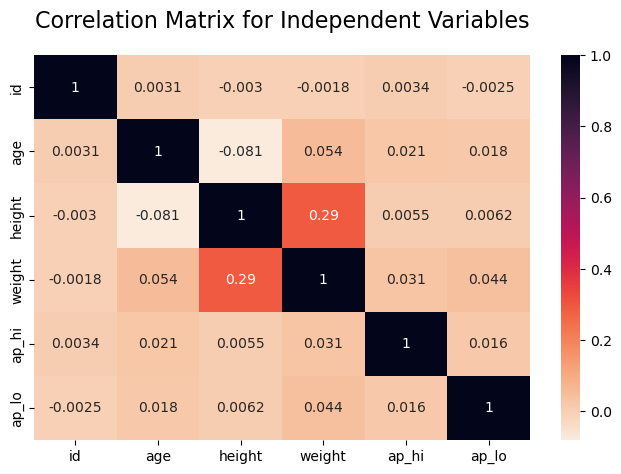

In [100]:
# heatmap for correlation
plt.figure(figsize = (8, 5))
plt.title('Correlation Matrix for Independent Variables', fontsize = 16, y = 1.05)

sns.heatmap(viz_df[numeric_cols].corr(), annot = True, cmap = 'rocket_r');

<AxesSubplot:xlabel='cardio', ylabel='count'>

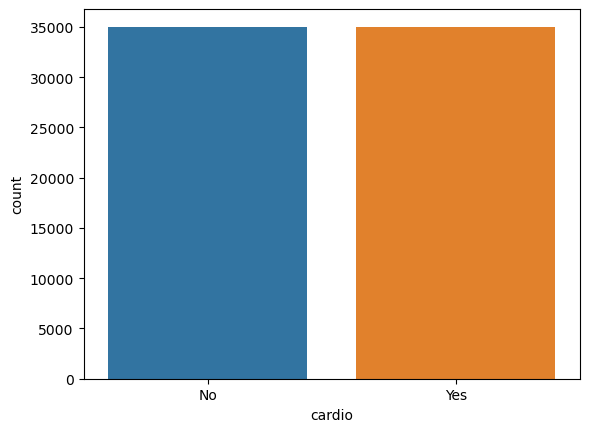

In [101]:
sns.countplot(viz_df.cardio)

In [102]:
x1=pd.crosstab(viz_df["gender"],viz_df["cardio"])
print(x1)

cardio     No    Yes
gender              
man     12107  12363
woman   22914  22616


<AxesSubplot:xlabel='gender'>

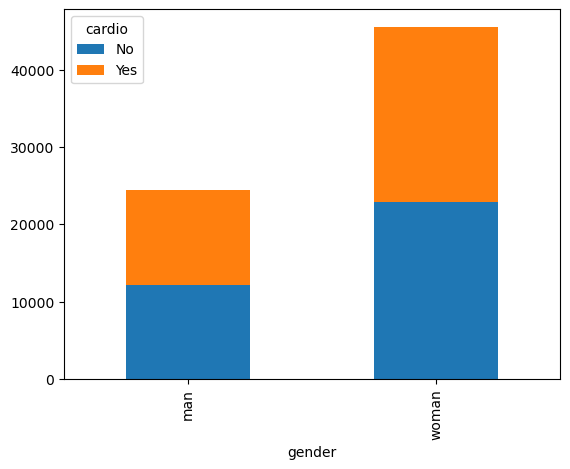

In [103]:
x1.plot(kind="bar",stacked=True)


In [104]:
#womens having more chances of getting cardiovascular disease as compared to men

In [105]:
x2=pd.crosstab(viz_df["gluc"],viz_df["cardio"])
x2

cardio,No,Yes
gluc,,
above normal,2112,3078
normal,30894,28585
well above normal,2015,3316


<AxesSubplot:xlabel='gluc'>

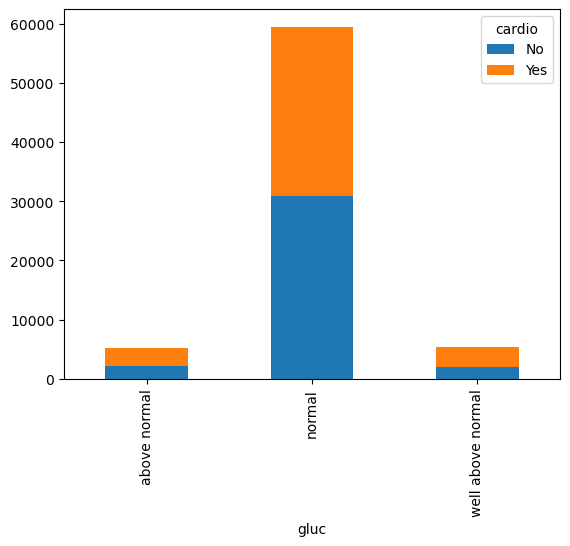

In [106]:
x2.plot(kind="bar",stacked=True)


In [107]:
# the peaple who having normal glucose,they are getting more chances for cardivascular disease 

In [108]:
x3=pd.crosstab(viz_df["alco"],viz_df["cardio"])
x3

cardio,No,Yes
alco,,
No,33080,33156
Yes,1941,1823


In [109]:
x4=pd.crosstab(viz_df["smoke"],viz_df["cardio"])
x4

cardio,No,Yes
smoke,,
No,31781,32050
Yes,3240,2929


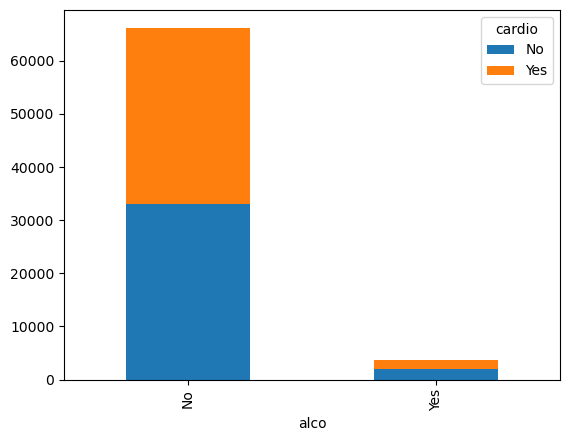

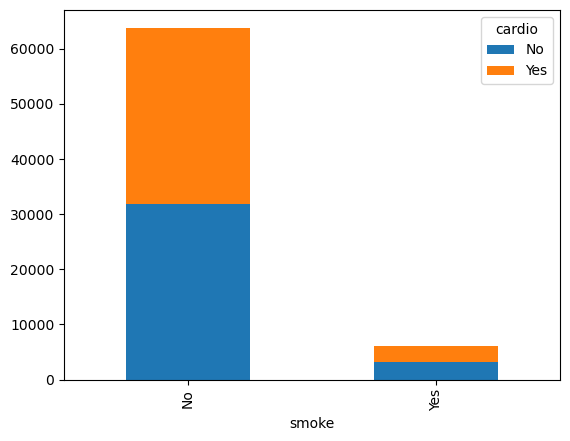

In [110]:
x3.plot(kind="bar",stacked=True)
x4.plot(kind="bar",stacked=True)
plt .show()

In [111]:
#if your not drink alcohol or not smoke, but still having chances for disease

# outlier tratment

<AxesSubplot:>

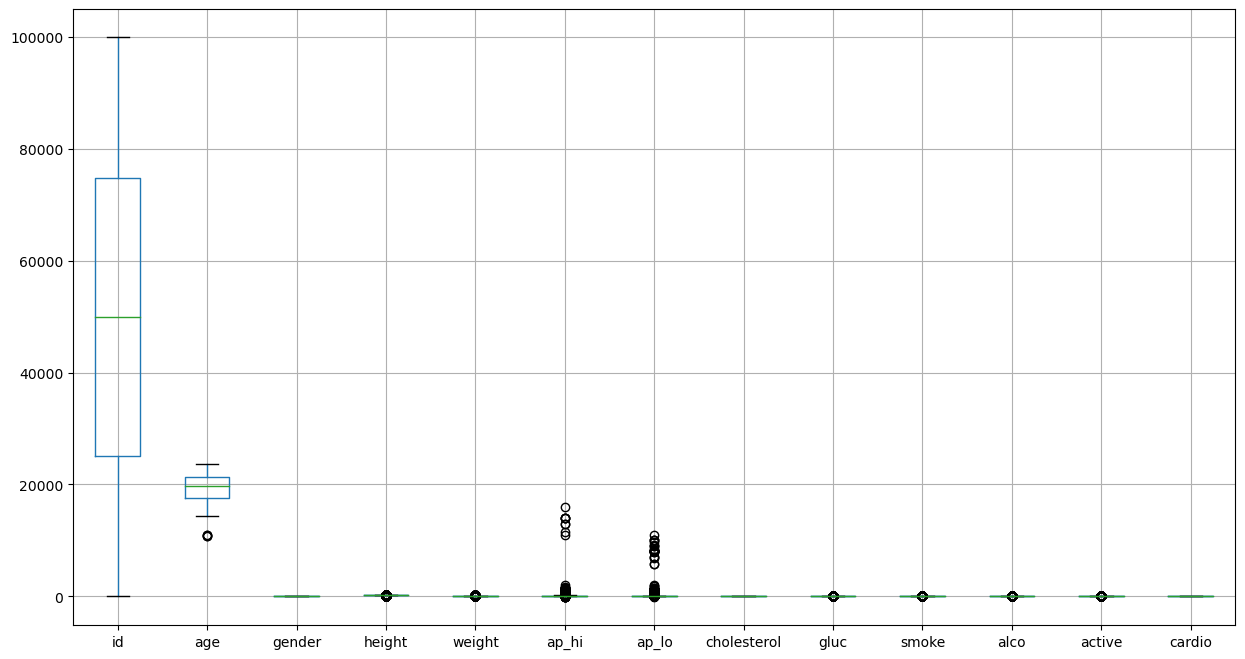

In [112]:
fig=plt.figure(figsize=(15,8))
disease_df.boxplot()

# numeric_cols

# age

In [113]:
disease_df.age.value_counts()

19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: age, Length: 8076, dtype: int64

<AxesSubplot:>

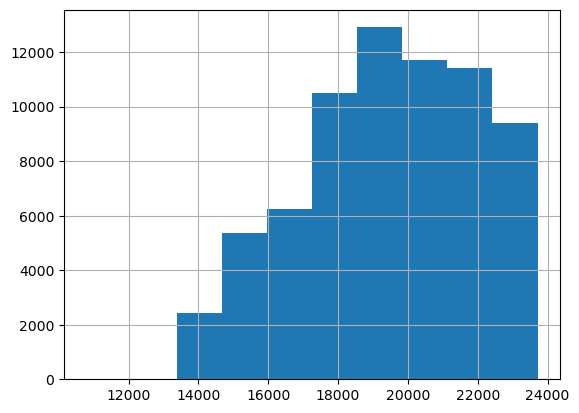

In [114]:
disease_df.age.hist()

<AxesSubplot:ylabel='age'>

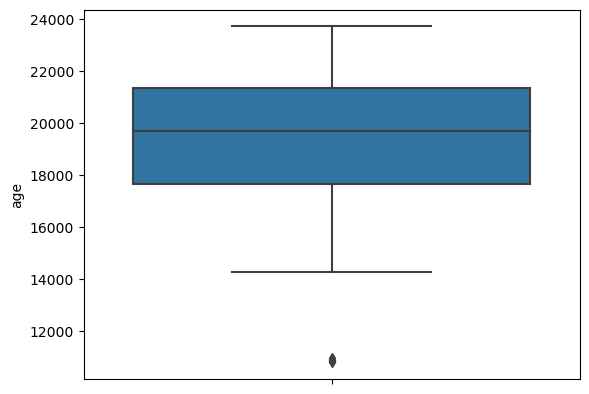

In [115]:
sns.boxplot(data=disease_df,y="age")

In [116]:
iqr=disease_df.age.quantile(0.75)-disease_df.age.quantile(0.25)
iqr

3663.0

In [117]:
disease_df.age.skew()

-0.3070553957245462

In [118]:
lb=disease_df["age"].quantile(0.25)-(iqr*3)
ub=disease_df["age"].quantile(0.75)+(iqr*3)
print(lb,ub)

6675.0 32316.0


In [119]:
disease_df.loc[disease_df.age<6675.0,"age"]=6675.0

<AxesSubplot:ylabel='age'>

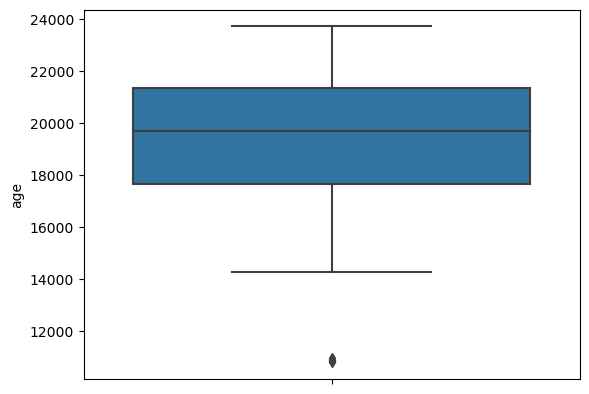

In [120]:
sns.boxplot(data=disease_df,y="age")

<AxesSubplot:>

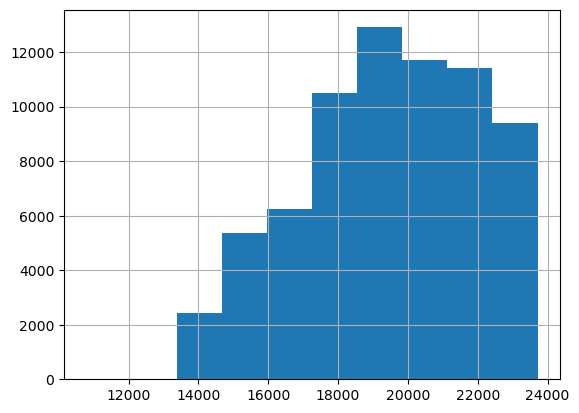

In [121]:
disease_df.age.hist()

# height

In [122]:
disease_df.height.value_counts()

165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: height, Length: 109, dtype: int64

<AxesSubplot:xlabel='height', ylabel='Density'>

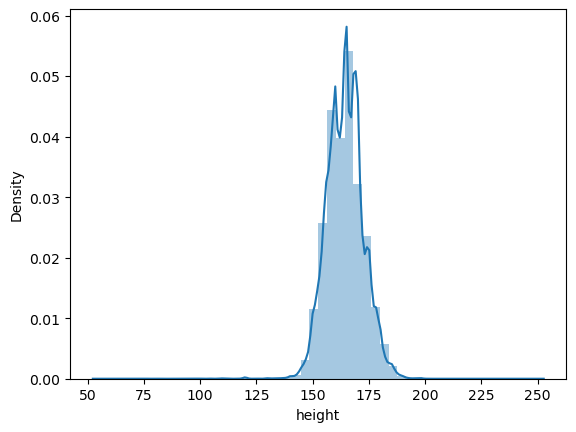

In [123]:
sns.distplot(disease_df.height)

<AxesSubplot:>

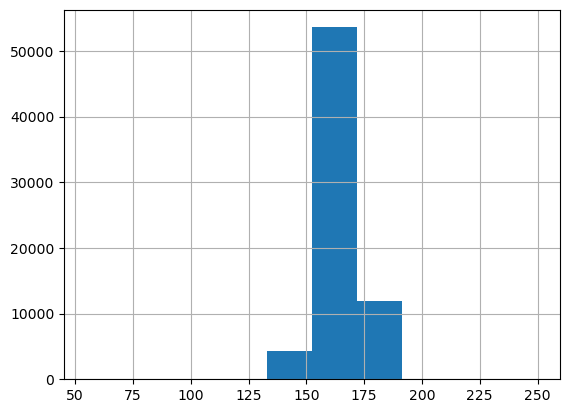

In [124]:
disease_df.height.hist()

<AxesSubplot:xlabel='height'>

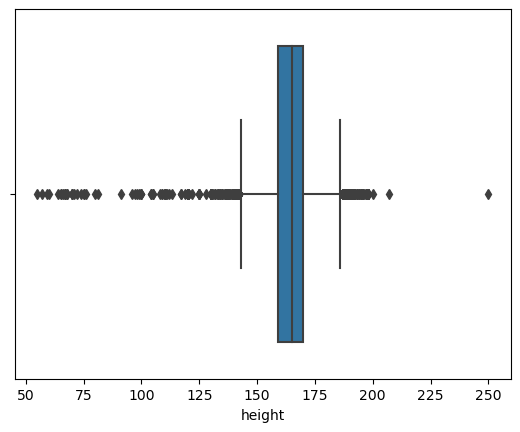

In [125]:
sns.boxplot(disease_df.height)

In [126]:
disease_df.height.skew()

-0.6421874521557643

In [127]:
upperboundry=disease_df.height.mean()+3*disease_df.height.std()
lowerboundry=disease_df.height.mean()-3*disease_df.height.std()
print(lowerboundry,upperboundry)

139.72884947781415 188.98960766504297


In [128]:
disease_df.loc[disease_df.height>188.9896076650429,"height"]=188.9896076650429
disease_df.loc[disease_df.height<139.72884947781415,"height"]=139.72884947781415


<AxesSubplot:>

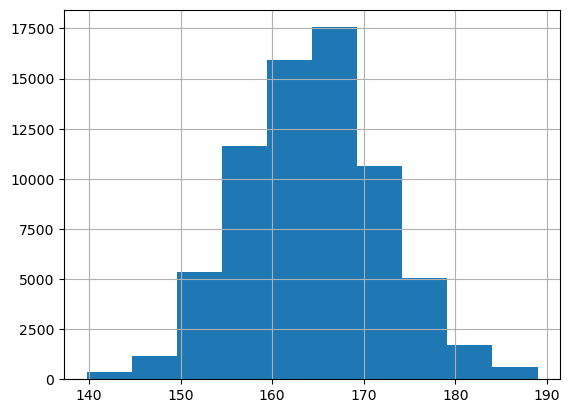

In [129]:
disease_df.height.hist()

<AxesSubplot:xlabel='height'>

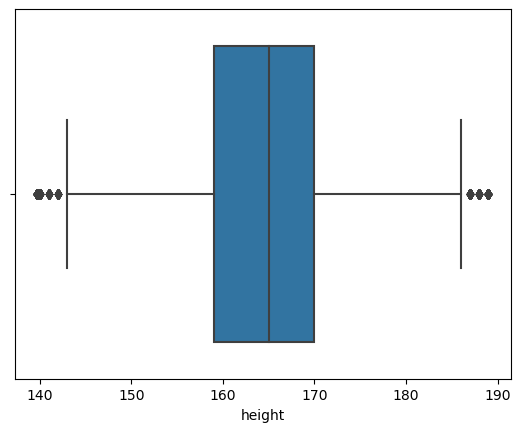

In [130]:
sns.boxplot(disease_df.height)

# weight

<AxesSubplot:>

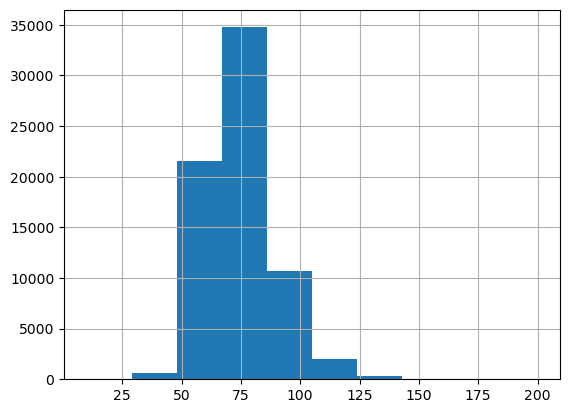

In [131]:
disease_df.weight.hist()

<AxesSubplot:xlabel='weight', ylabel='Density'>

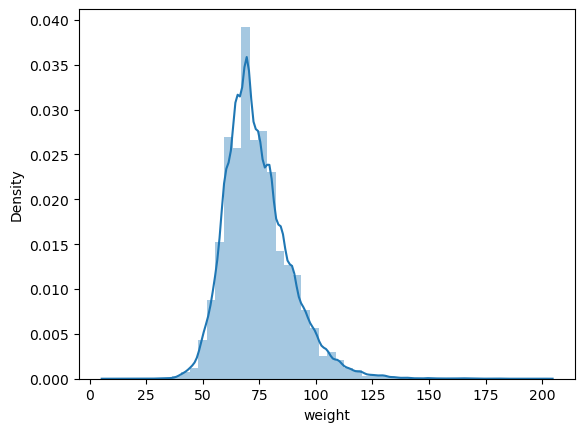

In [132]:
sns.distplot(disease_df.weight)

<AxesSubplot:xlabel='weight'>

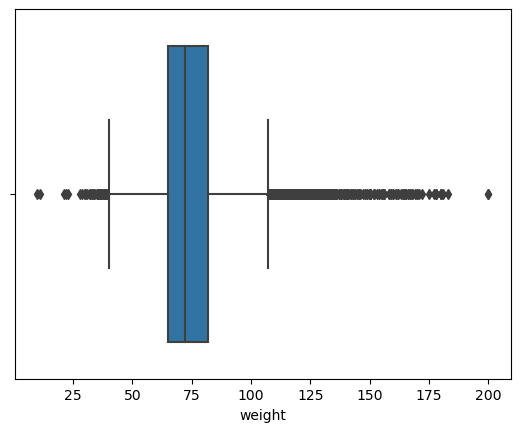

In [133]:
sns.boxplot(disease_df.weight)

In [134]:
upperboundry=disease_df.weight.mean()+3*disease_df.weight.std()
lowerboundry=disease_df.weight.mean()-3*disease_df.weight.std()
print(lowerboundry,upperboundry)

31.018419964468322 117.39296003553169


In [135]:
disease_df.loc[disease_df.weight>117.3929600355316,"weight"]=117.3929600355316
disease_df.loc[disease_df.weight<31.018419964468322,"weight"]=31.018419964468322


<AxesSubplot:>

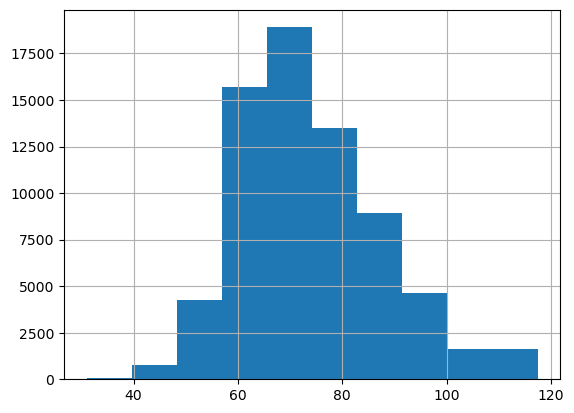

In [136]:
disease_df.weight.hist()

<AxesSubplot:xlabel='weight'>

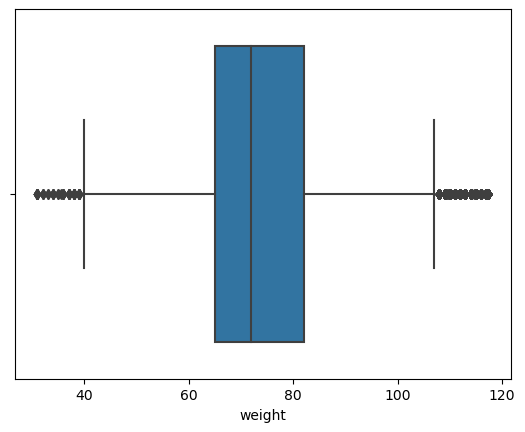

In [137]:
sns.boxplot(disease_df.weight)

# ap_hi

<AxesSubplot:xlabel='ap_hi'>

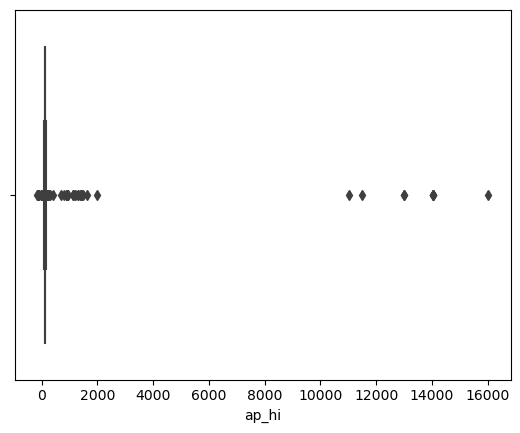

In [138]:
sns.boxplot(disease_df.ap_hi)


<AxesSubplot:xlabel='ap_lo'>

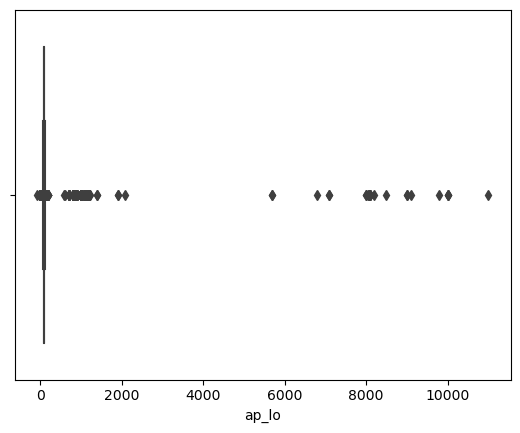

In [139]:
sns.boxplot(disease_df.ap_lo)

# skewness treatment

In [140]:
disease_df.skew()

id             -0.001278
age            -0.307055
gender          0.630960
height          0.080244
weight          0.680283
ap_hi          85.296214
ap_lo          32.114083
cholesterol     1.587123
gluc            2.397462
smoke           2.905867
alco            3.956607
active         -1.529473
cardio          0.001200
dtype: float64

In [141]:
#only age is numerical column having skewness 

In [142]:
disease_df.loc[disease_df["age"]==0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [143]:
v=np.log(disease_df.age)
v

0         9.819725
1         9.914823
2         9.844639
3         9.776960
4         9.768469
           ...    
69995     9.864747
69996    10.025749
69997     9.855662
69998    10.018199
69999     9.930129
Name: age, Length: 70000, dtype: float64

(array([4.0000e+00, 0.0000e+00, 0.0000e+00, 3.1420e+03, 5.0340e+03,
        6.1520e+03, 1.0470e+04, 1.4806e+04, 1.7698e+04, 1.2694e+04]),
 array([ 9.28711621,  9.36578246,  9.44444871,  9.52311496,  9.60178121,
         9.68044746,  9.7591137 ,  9.83777995,  9.9164462 ,  9.99511245,
        10.0737787 ]),
 <BarContainer object of 10 artists>)

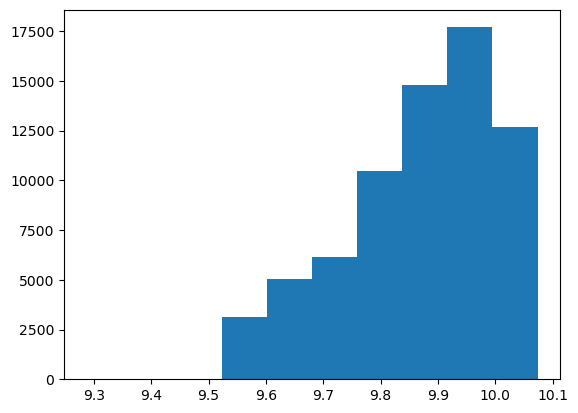

In [144]:
plt.hist(v)

In [145]:
v.skew()

-0.5225833020298112

# feature selection

In [146]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importance,columns
0,0.187869,id
1,0.227693,age
2,0.015161,gender
3,0.112447,height
4,0.121280,weight
5,0.232382,ap_hi
6,0.034537,ap_lo
7,0.029598,cholesterol
8,0.014968,gluc
9,0.007391,smoke


In [147]:
dt_df1=dt_df.sort_values(["Importance"],ascending=False)
dt_df1

,Importance,columns
5,0.232382,ap_hi
1,0.227693,age
0,0.187869,id
4,0.121280,weight
3,0.112447,height
6,0.034537,ap_lo
7,0.029598,cholesterol
2,0.015161,gender
8,0.014968,gluc
11,0.010741,active


In [148]:
disease_df=disease_df.drop(["id","smoke","alco"],axis=1)

In [149]:
disease_df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,cardio
0,18393,2,168.0,62.0,110,80,1,1,1,0
1,20228,1,156.0,85.0,140,90,3,1,1,1


# splitting

In [150]:
x1=disease_df.iloc[:,0:9]
y1=disease_df.iloc[:,-1]


In [151]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=100)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape


((56000, 9), (14000, 9), (56000,), (14000,))

# logistic regression

In [152]:
lg.fit(x1_train,y1_train)

LogisticRegression()

In [153]:
lg_p=lg.predict(x1_test)
lg_p

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [154]:
lg_prob=lg.predict_proba(x1_test)
#lg_prob

In [155]:
lg_m=confusion_matrix(lg_p,y1_test)
lg_m

array([[5093, 2435],
       [1876, 4596]], dtype=int64)

In [156]:
lg_ac=lg_m.diagonal().sum()/lg_m.sum()*100
lg_ac

69.20714285714286

In [157]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.6536765751671171

In [158]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.7101359703337453

In [159]:
lg_f1=f1_score(lg_p,y_test)
lg_f1

0.6807376138635858

In [160]:
print(classification_report(lg_p,y1_test))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      7528
           1       0.65      0.71      0.68      6472

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.70      0.69      0.69     14000



# decision tree

In [161]:
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [162]:
dt_p=dt.predict(x1_test)

In [163]:
dt_cf=confusion_matrix(dt_p,y1_test)
dt_cf

array([[4405, 2613],
       [2564, 4418]], dtype=int64)

In [164]:
dt_ac=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_ac

63.02142857142857

In [165]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.6283601194709145

In [166]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.6327699799484389

In [167]:
dt_f1=f1_score(dt_p,y_test)
dt_f1

0.6305573396132164

In [168]:
print(classification_report(dt_p,y1_test))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      7018
           1       0.63      0.63      0.63      6982

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



# random forest

In [169]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [170]:
rf_p=rf.predict(x1_test)

In [171]:
cf=confusion_matrix(rf_p,y1_test)
cf

array([[5046, 2163],
       [1923, 4868]], dtype=int64)

In [172]:
rf_ac=cf.diagonal().sum()/cf.sum()*100
rf_ac

70.81428571428572

In [173]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.6923623951073816

In [174]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.7168310999852746

In [175]:
rf_f1=f1_score(rf_p,y_test)
rf_f1

0.7043843148603675

In [176]:
print(classification_report(rf_p,y1_test))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      7209
           1       0.69      0.72      0.70      6791

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



# boosting

In [177]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [178]:
adbo.fit(x1_train,y1_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [179]:
ad_p=adbo.predict(x1_test)
ad_p

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [180]:
ad_cf=confusion_matrix(ad_p,y1_test)
ad_cf

array([[4415, 2396],
       [2554, 4635]], dtype=int64)

In [181]:
ad_ac=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_ac

64.64285714285715

In [182]:
ad_pr=precision_score(ad_p,y_test)
ad_pr

0.6592234390556109

In [183]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.6447350118236194

In [184]:
ad_f1=f1_score(ad_p,y_test)
ad_f1

0.6518987341772152

In [185]:
print(classification_report(ad_p,y1_test))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6811
           1       0.66      0.64      0.65      7189

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000



# XGBOOST classifier

In [186]:
xgb.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [187]:
xgb_p=xgb.predict(x1_test)

In [188]:
xgb_cf=confusion_matrix(xgb_p,y1_test)
xgb_cf

array([[5351, 2174],
       [1618, 4857]], dtype=int64)

In [189]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

72.91428571428571

In [190]:
xgb_pr=precision_score(xgb_p,y_test)
xgb_pr

0.690797895036268

In [191]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.7501158301158302

In [192]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_f1

0.7192358951577078

In [193]:
print(classification_report(xgb_p,y1_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      7525
           1       0.69      0.75      0.72      6475

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



# KNN

In [194]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=24)

In [195]:
k_p=knn.predict(x1_test)
k_p

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [196]:
ck=confusion_matrix(k_p,y1_test)
ck

array([[5437, 2581],
       [1532, 4450]], dtype=int64)

In [197]:
k_acc=ck.diagonal().sum()/ck.sum()*100
k_ac

57.30714285714286

In [198]:
k_pr=precision_score(k_p,y_test)
k_pr

0.6329113924050633

In [199]:
k_re=recall_score(k_p,y_test)
k_re

0.7438983617519225

In [200]:
k_f1=f1_score(k_p,y_test)
k_f1

0.6839314531622224

In [201]:
print(classification_report(k_p,y1_test))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      8018
           1       0.63      0.74      0.68      5982

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.70     14000
weighted avg       0.72      0.71      0.71     14000



In [219]:
lst=list()

In [220]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    kn_pred=knn.predict(x1_test)
    cf_k=confusion_matrix(kn_pred,y1_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

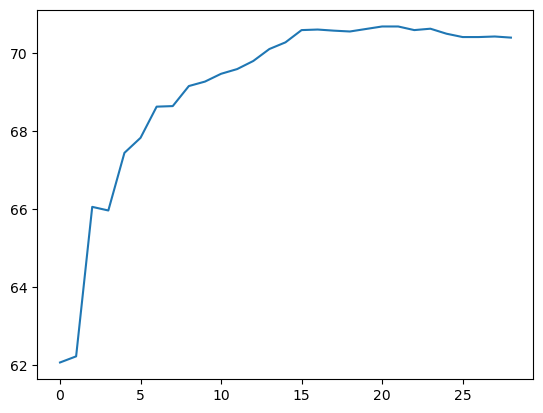

In [221]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# svm

In [202]:
svc.fit(x1_train,y1_train)

SVC()

In [203]:
s_p=svc.predict(x1_test)
s_p

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [204]:
cs=confusion_matrix(s_p,y1_test)
cs

array([[4515, 3089],
       [2454, 3942]], dtype=int64)

In [205]:
s_ac=cs.diagonal().sum()/cs.sum()*100
s_ac

60.40714285714286

In [206]:
s_pr=precision_score(s_p,y_test)
s_pr

0.5606599345754516

In [207]:
s_re=recall_score(s_p,y_test)
s_re

0.6163227016885553

In [208]:
s_f1=f1_score(s_p,y_test)
s_f1

0.5871750949579205

In [209]:
print(classification_report(s_p,y1_test))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      7604
           1       0.56      0.62      0.59      6396

    accuracy                           0.60     14000
   macro avg       0.60      0.61      0.60     14000
weighted avg       0.61      0.60      0.60     14000



# cross validation for best fit i.e XGBOOST

In [210]:
from sklearn.model_selection import KFold
xgb_cv=XGBClassifier()
kfold_validation=KFold(10)

In [211]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(xgb_cv,x1,y1,cv=kfold_validation,scoring="accuracy")
print(cv)
xgb_ac=np.mean(cv);rf_ac

[0.73242857 0.73528571 0.73857143 0.73742857 0.72971429 0.73442857
 0.73057143 0.735      0.73028571 0.73242857]


70.81428571428572

# Final dataframe

In [212]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","ADA BOOST","XGBOOST","KNN","SVM"]
list2=[lg_ac,dt_ac,rf_ac,ad_ac,xgb_ac,k_acc,s_ac]
list3=[lg_pr,dt_pr,rf_pr,ad_pr,xgb_pr,knn_pr,s_pr]
list4=[lg_re,dt_re,rf_re,ad_re,xgb_re,knn_re,s_re]
list5=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,knn_f1,s_f1]



In [213]:
df2=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df2

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,69.207143,0.653677,0.710136,0.680738
1,DECISION TREE,63.021429,0.628360,0.632770,0.630557
2,RANDOM FOREST,70.814286,0.692362,0.716831,0.704384
3,ADA BOOST,64.642857,0.659223,0.644735,0.651899
4,XGBOOST,0.733614,0.690798,0.750116,0.719236
5,KNN,70.621429,0.511307,0.585887,0.546062
6,SVM,60.407143,0.560660,0.616323,0.587175


# AUC ROC CURVE

In [214]:
roc=roc_auc_score(xgb_p,y1_test)
roc

0.7306060878153902

In [215]:
xgb_prob=xgb.predict_proba(x1_test)

In [216]:
df=pd.DataFrame(xgb_prob)
#df

In [217]:
fpr,tpr,threshhold=roc_curve(y_test,df.iloc[:,1])

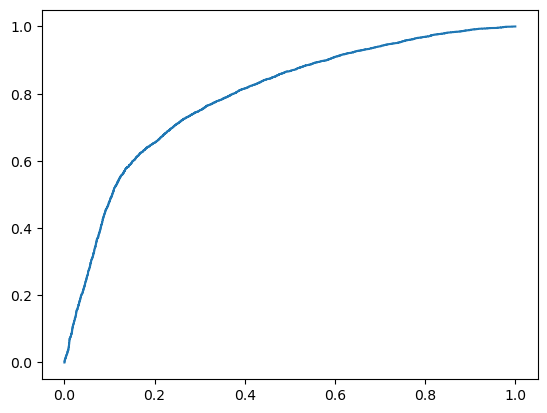

In [218]:
plt.plot(fpr,tpr)